In [ ]:
import pandas as pd
import numpy as np
import os
import re
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import filtfilt
import scipy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
df_final = pd.read_csv('/content/drive/MyDrive/Schrizophrenia/schizophrenia_final_csv.csv')

In [ ]:
df_final.shape

(645120, 18)

In [ ]:
df_final.head()

,Unnamed: 0,F7,F3,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,T6,O1,O2,target
0,0,-252.08,-134.44,33.61,92.43,-176.45,-92.43,-50.42,-134.44,8.40,117.64,-25.21,-117.64,-277.28,-50.42,117.64,-277.28,1
1,1,-176.45,-33.61,134.44,92.43,-117.64,-75.62,8.40,-25.21,-16.81,252.08,92.43,0.00,-117.64,-50.42,336.10,-134.44,1
2,2,-16.81,176.45,394.92,159.65,92.43,117.64,92.43,159.65,134.44,378.11,294.09,294.09,159.65,58.82,394.92,75.62,1
3,3,67.22,319.30,512.55,218.47,218.47,252.08,218.47,218.47,277.28,352.91,378.11,436.93,319.30,176.45,336.10,176.45,1
4,4,327.70,672.20,756.23,453.74,394.92,453.74,512.55,394.92,394.92,436.93,579.78,638.59,596.58,159.65,453.74,378.11,1


In [ ]:
df_final.drop('Unnamed: 0',axis=1, inplace= True)

In [ ]:
df_final.head()

,F7,F3,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,T6,O1,O2,target
0,-252.08,-134.44,33.61,92.43,-176.45,-92.43,-50.42,-134.44,8.40,117.64,-25.21,-117.64,-277.28,-50.42,117.64,-277.28,1
1,-176.45,-33.61,134.44,92.43,-117.64,-75.62,8.40,-25.21,-16.81,252.08,92.43,0.00,-117.64,-50.42,336.10,-134.44,1
2,-16.81,176.45,394.92,159.65,92.43,117.64,92.43,159.65,134.44,378.11,294.09,294.09,159.65,58.82,394.92,75.62,1
3,67.22,319.30,512.55,218.47,218.47,252.08,218.47,218.47,277.28,352.91,378.11,436.93,319.30,176.45,336.10,176.45,1
4,327.70,672.20,756.23,453.74,394.92,453.74,512.55,394.92,394.92,436.93,579.78,638.59,596.58,159.65,453.74,378.11,1


In [ ]:
df_final.describe()

,F7,F3,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,T6,O1,O2,target
count,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000
mean,7.783969,0.874987,1.724818,2.467679,4.492934,3.841987,3.801939,3.072804,4.120217,5.971288,5.474481,4.849737,3.841628,5.658982,7.427329,6.276220,0.535714
std,341.361399,388.671749,380.418061,324.615547,323.351126,389.158905,410.740270,390.984711,325.585680,333.101925,437.524588,470.524283,453.263853,363.862759,564.837736,564.618013,0.498723
min,-3990.940000,-2890.430000,-2610.280000,-2618.220000,-3001.620000,-2710.360000,-3091.240000,-2971.450000,-2137.360000,-2710.360000,-3371.130000,-3980.610000,-3468.760000,-2660.630000,-4570.000000,-4190.000000,0.000000
25%,-172.490000,-230.300000,-222.470000,-177.010000,-172.080000,-230.750000,-250.110000,-231.120000,-180.110000,-180.470000,-250.230000,-270.030000,-252.000000,-193.042500,-293.870000,-310.480000,0.000000
50%,8.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.850000,0.000000,1.000000
75%,189.190000,219.610000,219.520000,179.460000,179.365000,238.330000,252.080000,238.550000,183.160000,189.580000,259.450000,279.040000,267.690000,205.810000,318.910000,329.810000,1.000000
max,4227.160000,3457.390000,2784.950000,2698.820000,3061.320000,3232.540000,2999.020000,2908.400000,2219.310000,3058.080000,3070.910000,2998.300000,3033.610000,2722.790000,3449.240000,3610.000000,1.000000


In [ ]:
df_final.dtypes

F7        float64
F3        float64
F4        float64
F8        float64
T3        float64
C3        float64
Cz        float64
C4        float64
T4        float64
T5        float64
P3        float64
Pz        float64
P4        float64
T6        float64
O1        float64
O2        float64
target      int64
dtype: object

In [ ]:
df_final.isnull().any()

F7        False
F3        False
F4        False
F8        False
T3        False
C3        False
Cz        False
C4        False
T4        False
T5        False
P3        False
Pz        False
P4        False
T6        False
O1        False
O2        False
target    False
dtype: bool

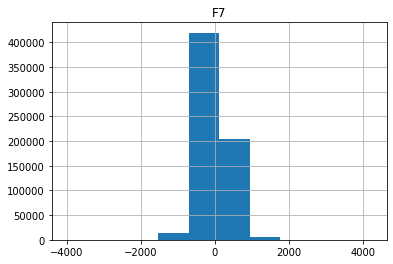

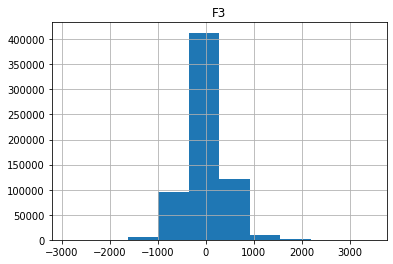

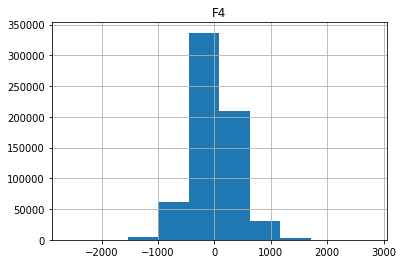

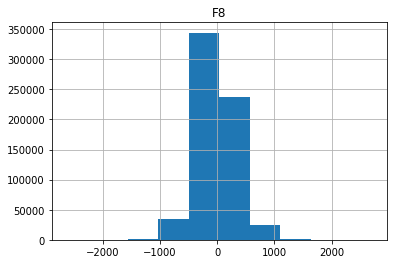

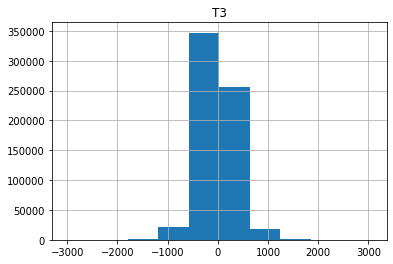

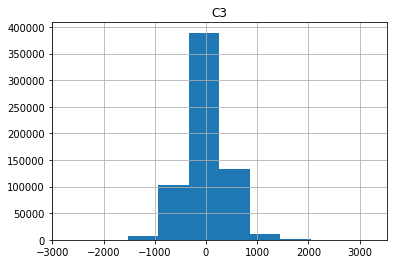

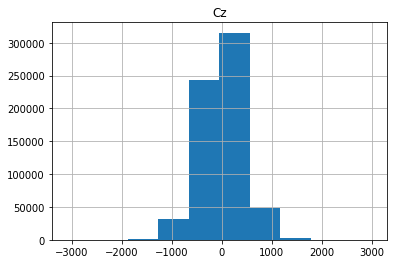

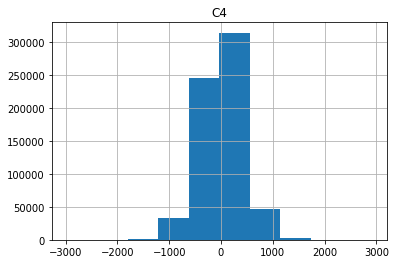

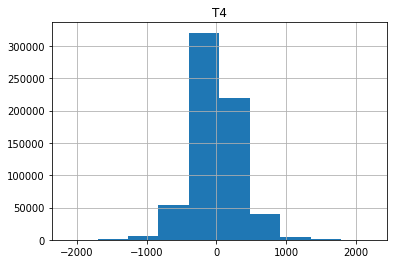

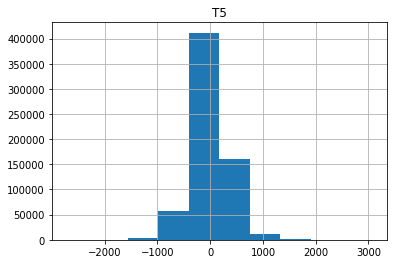

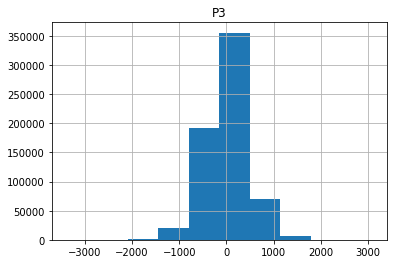

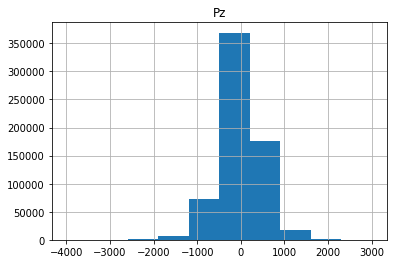

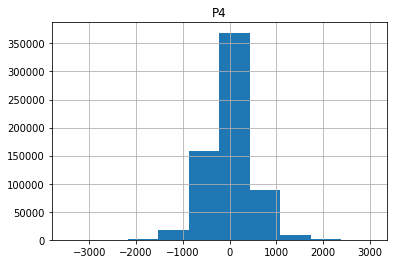

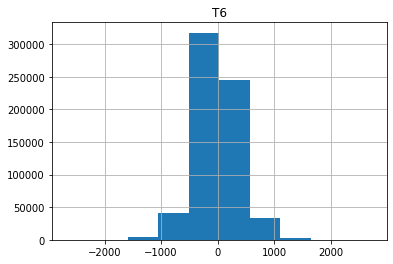

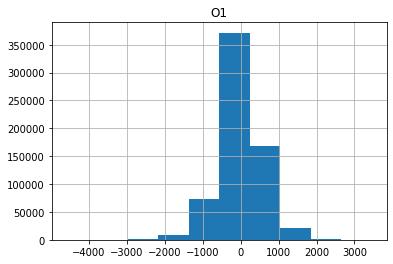

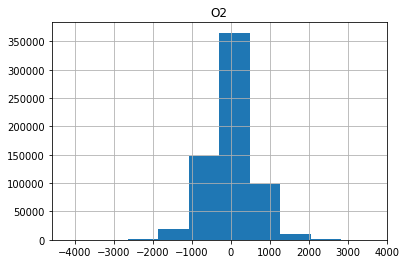

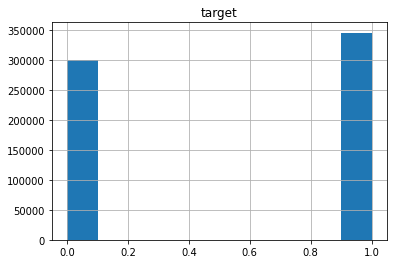

In [ ]:
for i in df_final.columns:
  df_final[[i]].hist()

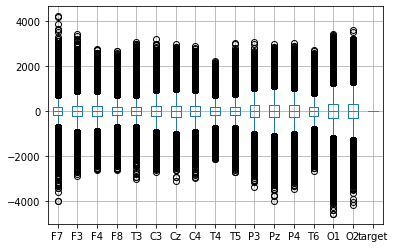

In [ ]:
df_final.boxplot()

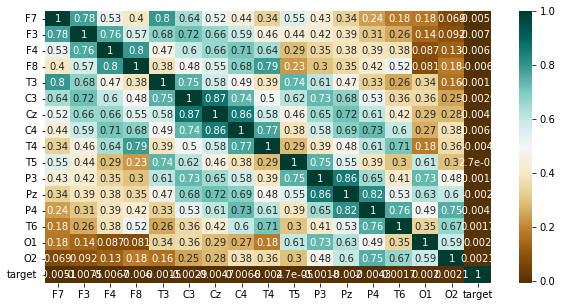

In [ ]:
plt.figure(figsize=(10,5))
c= df_final.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

In [ ]:
signal = df_final

Applying Low Pass Filter

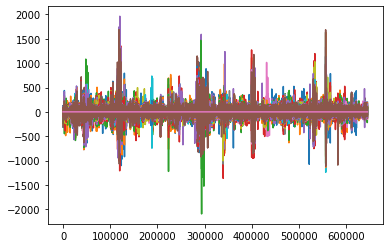

In [ ]:
fs= 4000.0
lowcut = 20.0
highcut = 50.0

nyq = 0.5*fs
low = lowcut / nyq
high = highcut / nyq

order =2 

b, a = scipy.signal.butter(order, low, btype='low', analog=False)

y = scipy.signal.filtfilt(b,a,signal,axis=0)

plt.plot(y)

In [ ]:
y.shape, df_final.shape, df_final.head()

((645120, 17),
 (645120, 17),
        F7      F3      F4      F8  ...      T6      O1      O2  target
 0 -252.08 -134.44   33.61   92.43  ...  -50.42  117.64 -277.28       1
 1 -176.45  -33.61  134.44   92.43  ...  -50.42  336.10 -134.44       1
 2  -16.81  176.45  394.92  159.65  ...   58.82  394.92   75.62       1
 3   67.22  319.30  512.55  218.47  ...  176.45  336.10  176.45       1
 4  327.70  672.20  756.23  453.74  ...  159.65  453.74  378.11       1
 
 [5 rows x 17 columns])

In [ ]:
y

array([[-3.14743460e+002, -2.62954887e+002, -6.02406603e+000, ...,
        -4.73124623e+000, -3.06720392e+002,  1.00000000e+000],
       [-3.08926227e+002, -2.58463838e+002, -7.99497989e+000, ...,
        -5.09255906e+000, -3.02135244e+002,  1.00000000e+000],
       [-3.03134358e+002, -2.54015346e+002, -9.98655586e+000, ...,
        -5.47900984e+000, -2.97539078e+002,  1.00000000e+000],
       ...,
       [ 2.00580092e+002,  1.89752971e+002,  1.28976395e+002, ...,
         4.81928969e+001,  1.04031565e+002,  5.43472210e-323],
       [ 2.00923598e+002,  1.90031698e+002,  1.29181962e+002, ...,
         4.82747496e+001,  1.04192004e+002,  5.43472210e-323],
       [ 2.01208288e+002,  1.90261634e+002,  1.29347344e+002, ...,
         4.83405883e+001,  1.04331281e+002,  5.43472210e-323]])

In [ ]:
lp_filtered_df = pd.DataFrame(y,columns=df_final.columns)

In [ ]:
lp_filtered_df.shape, lp_filtered_df.head()

((645120, 17),
            F7          F3         F4  ...        O1          O2  target
 0 -314.743460 -262.954887  -6.024066  ... -4.731246 -306.720392     1.0
 1 -308.926227 -258.463838  -7.994980  ... -5.092559 -302.135244     1.0
 2 -303.134358 -254.015346  -9.986556  ... -5.479010 -297.539078     1.0
 3 -297.374854 -249.616777 -12.001089  ... -5.891777 -292.936898     1.0
 4 -291.654443 -245.275081 -14.040514  ... -6.331691 -288.333377     1.0
 
 [5 rows x 17 columns])

In [ ]:
lp_filtered_df['target'] = df_final['target']

In [ ]:
lp_filtered_df.head()

,F7,F3,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,T6,O1,O2,target
0,-314.743460,-262.954887,-6.024066,60.816262,-168.931306,-193.483437,-144.109988,-158.602224,48.292171,83.329619,-27.756071,-63.692657,-232.603901,-49.296876,-4.731246,-306.720392,1
1,-308.926227,-258.463838,-7.994980,58.170732,-166.218293,-191.097076,-142.945615,-157.718460,44.887962,80.097812,-28.837557,-64.212640,-231.486072,-51.481319,-5.092559,-302.135244,1
2,-303.134358,-254.015346,-9.986556,55.510887,-163.518098,-188.726857,-141.792753,-156.830904,41.495365,76.854291,-29.913044,-64.713294,-230.334112,-53.647030,-5.479010,-297.539078,1
3,-297.374854,-249.616777,-12.001089,52.836743,-160.835770,-186.376801,-140.654396,-155.942421,38.115333,73.599671,-30.983701,-65.196685,-229.150840,-55.792740,-5.891777,-292.936898,1
4,-291.654443,-245.275081,-14.040514,50.148429,-158.176125,-184.050639,-139.533285,-155.055599,34.748915,70.334813,-32.050409,-65.664572,-227.938724,-57.917069,-6.331691,-288.333377,1


In [ ]:
lp_filtered_df.describe()

,F7,F3,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,T6,O1,O2,target
count,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000
mean,7.763810,0.854793,1.712777,2.457649,4.477188,3.826370,3.788867,3.059834,4.113787,5.966800,5.466833,4.839798,3.831025,5.653465,7.422055,6.267933,0.535714
std,130.494629,124.554551,115.775260,115.062596,116.081371,95.629399,95.764643,91.143991,97.445342,96.601682,90.492441,87.810701,99.552584,108.394823,112.102116,121.630017,0.498723
min,-1101.848647,-916.310205,-1221.688588,-1364.558555,-872.103310,-853.271055,-835.000762,-1070.714712,-1003.649731,-1239.509052,-801.822514,-1136.737088,-2094.487559,-1209.330391,-945.790751,-1117.605841,0.000000
25%,-40.163186,-48.688717,-47.921881,-41.008863,-37.204886,-37.486028,-37.907554,-37.863077,-34.635665,-30.173331,-36.908170,-37.343547,-36.720128,-30.459629,-36.188607,-36.007140,0.000000
50%,8.210047,3.295959,2.880583,3.765138,3.820370,3.832988,4.397612,4.165661,3.790062,4.834568,4.334067,4.427302,4.579086,4.344905,5.924837,5.383679,1.000000
75%,55.823306,52.052075,52.468193,46.358510,43.668650,44.818657,46.359086,45.373898,41.474237,39.790144,45.624635,46.222132,45.690470,39.320412,47.517811,47.072928,1.000000
max,1483.909918,1370.582160,1382.477470,1324.696894,1591.525385,1147.663783,1015.139364,970.092469,1062.835316,1633.687676,989.745210,1633.898089,1469.150173,1933.887490,1963.423338,1687.758045,1.000000


Applying High Pass Filter

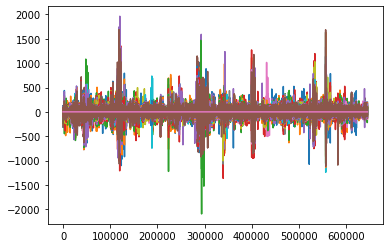

In [ ]:
fs= 4000.0
lowcut = 20.0
highcut = 50.0

nyq = 0.5*fs
low = lowcut / nyq
high = highcut / nyq

order =2 

b, a = scipy.signal.butter(order, low, btype='low', analog=False)

y = scipy.signal.filtfilt(b,a,signal,axis=0)

plt.plot(y)

In [ ]:
y.shape, df_final.shape, df_final.head()

((645120, 17),
 (645120, 17),
        F7      F3      F4      F8  ...      T6      O1      O2  target
 0 -252.08 -134.44   33.61   92.43  ...  -50.42  117.64 -277.28       1
 1 -176.45  -33.61  134.44   92.43  ...  -50.42  336.10 -134.44       1
 2  -16.81  176.45  394.92  159.65  ...   58.82  394.92   75.62       1
 3   67.22  319.30  512.55  218.47  ...  176.45  336.10  176.45       1
 4  327.70  672.20  756.23  453.74  ...  159.65  453.74  378.11       1
 
 [5 rows x 17 columns])

In [ ]:
y

array([[-3.14743460e+002, -2.62954887e+002, -6.02406603e+000, ...,
        -4.73124623e+000, -3.06720392e+002,  1.00000000e+000],
       [-3.08926227e+002, -2.58463838e+002, -7.99497989e+000, ...,
        -5.09255906e+000, -3.02135244e+002,  1.00000000e+000],
       [-3.03134358e+002, -2.54015346e+002, -9.98655586e+000, ...,
        -5.47900984e+000, -2.97539078e+002,  1.00000000e+000],
       ...,
       [ 2.00580092e+002,  1.89752971e+002,  1.28976395e+002, ...,
         4.81928969e+001,  1.04031565e+002,  5.43472210e-323],
       [ 2.00923598e+002,  1.90031698e+002,  1.29181962e+002, ...,
         4.82747496e+001,  1.04192004e+002,  5.43472210e-323],
       [ 2.01208288e+002,  1.90261634e+002,  1.29347344e+002, ...,
         4.83405883e+001,  1.04331281e+002,  5.43472210e-323]])

In [ ]:
hp_filtered_df = pd.DataFrame(y,columns=df_final.columns)

In [ ]:
hp_filtered_df.shape, hp_filtered_df.head()

((645120, 17),
            F7          F3         F4  ...        O1          O2  target
 0 -314.743460 -262.954887  -6.024066  ... -4.731246 -306.720392     1.0
 1 -308.926227 -258.463838  -7.994980  ... -5.092559 -302.135244     1.0
 2 -303.134358 -254.015346  -9.986556  ... -5.479010 -297.539078     1.0
 3 -297.374854 -249.616777 -12.001089  ... -5.891777 -292.936898     1.0
 4 -291.654443 -245.275081 -14.040514  ... -6.331691 -288.333377     1.0
 
 [5 rows x 17 columns])

In [ ]:
hp_filtered_df['target'] = df_final['target']

In [ ]:
hp_filtered_df.head()

,F7,F3,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,T6,O1,O2,target
0,-314.743460,-262.954887,-6.024066,60.816262,-168.931306,-193.483437,-144.109988,-158.602224,48.292171,83.329619,-27.756071,-63.692657,-232.603901,-49.296876,-4.731246,-306.720392,1
1,-308.926227,-258.463838,-7.994980,58.170732,-166.218293,-191.097076,-142.945615,-157.718460,44.887962,80.097812,-28.837557,-64.212640,-231.486072,-51.481319,-5.092559,-302.135244,1
2,-303.134358,-254.015346,-9.986556,55.510887,-163.518098,-188.726857,-141.792753,-156.830904,41.495365,76.854291,-29.913044,-64.713294,-230.334112,-53.647030,-5.479010,-297.539078,1
3,-297.374854,-249.616777,-12.001089,52.836743,-160.835770,-186.376801,-140.654396,-155.942421,38.115333,73.599671,-30.983701,-65.196685,-229.150840,-55.792740,-5.891777,-292.936898,1
4,-291.654443,-245.275081,-14.040514,50.148429,-158.176125,-184.050639,-139.533285,-155.055599,34.748915,70.334813,-32.050409,-65.664572,-227.938724,-57.917069,-6.331691,-288.333377,1


In [ ]:
hp_filtered_df.describe()

,F7,F3,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,T6,O1,O2,target
count,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000,645120.000000
mean,7.763810,0.854793,1.712777,2.457649,4.477188,3.826370,3.788867,3.059834,4.113787,5.966800,5.466833,4.839798,3.831025,5.653465,7.422055,6.267933,0.535714
std,130.494629,124.554551,115.775260,115.062596,116.081371,95.629399,95.764643,91.143991,97.445342,96.601682,90.492441,87.810701,99.552584,108.394823,112.102116,121.630017,0.498723
min,-1101.848647,-916.310205,-1221.688588,-1364.558555,-872.103310,-853.271055,-835.000762,-1070.714712,-1003.649731,-1239.509052,-801.822514,-1136.737088,-2094.487559,-1209.330391,-945.790751,-1117.605841,0.000000
25%,-40.163186,-48.688717,-47.921881,-41.008863,-37.204886,-37.486028,-37.907554,-37.863077,-34.635665,-30.173331,-36.908170,-37.343547,-36.720128,-30.459629,-36.188607,-36.007140,0.000000
50%,8.210047,3.295959,2.880583,3.765138,3.820370,3.832988,4.397612,4.165661,3.790062,4.834568,4.334067,4.427302,4.579086,4.344905,5.924837,5.383679,1.000000
75%,55.823306,52.052075,52.468193,46.358510,43.668650,44.818657,46.359086,45.373898,41.474237,39.790144,45.624635,46.222132,45.690470,39.320412,47.517811,47.072928,1.000000
max,1483.909918,1370.582160,1382.477470,1324.696894,1591.525385,1147.663783,1015.139364,970.092469,1062.835316,1633.687676,989.745210,1633.898089,1469.150173,1933.887490,1963.423338,1687.758045,1.000000


Models

Original Data

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l2
# load the dataset

In [ ]:
X = df_final.iloc[:,:-1]
y = df_final.iloc[:,-1]

In [ ]:
y

0         1
1         1
2         1
3         1
4         1
         ..
645115    0
645116    0
645117    0
645118    0
645119    0
Name: target, Length: 645120, dtype: int64

In [ ]:
model = Sequential()
model.add(Dense(16, activation='swish'))
#model.add(Dropout(0.1))
#model.add(BatchNormalization())
model.add(Dense(32, kernel_regularizer=l2(0.01) ,activation='swish'))
#model.add(Dropout(0.1))
#model.add(BatchNormalization())
model.add(Dense(64, kernel_regularizer=l2(0.01), activation='swish'))
#model.add(BatchNormalization())
model.add(Dense(1, activation='softmax'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=10, batch_size=10)

Epoch 1/10
64512/64512 [==============================] - 181s 3ms/step - loss: 0.7635 - accuracy: 0.5357
Epoch 2/10
64512/64512 [==============================] - 177s 3ms/step - loss: 0.6202 - accuracy: 0.5357
Epoch 3/10
64512/64512 [==============================] - 178s 3ms/step - loss: 0.6169 - accuracy: 0.5357
Epoch 4/10
64512/64512 [==============================] - 181s 3ms/step - loss: 0.6154 - accuracy: 0.5357
Epoch 5/10
64512/64512 [==============================] - 180s 3ms/step - loss: 0.6141 - accuracy: 0.5357
Epoch 6/10
64512/64512 [==============================] - 179s 3ms/step - loss: 0.6129 - accuracy: 0.5357
Epoch 7/10
64512/64512 [==============================] - 179s 3ms/step - loss: 0.6123 - accuracy: 0.5357
Epoch 8/10
64512/64512 [==============================] - 180s 3ms/step - loss: 0.6115 - accuracy: 0.5357
Epoch 9/10
64512/64512 [==============================] - 180s 3ms/step - loss: 0.6109 - accuracy: 0.5357
Epoch 10/10
64512/64512 [=====================

In [ ]:
model = Sequential()
model.add(Dense(16, activation='swish'))
model.add(Dropout(0.1))
#model.add(BatchNormalization())
model.add(Dense(32, kernel_regularizer=l2(0.01) ,activation='swish'))
model.add(Dropout(0.1))
#model.add(BatchNormalization())
model.add(Dense(64, kernel_regularizer=l2(0.01), activation='swish'))
#model.add(BatchNormalization())
model.add(Dense(1, activation='softmax'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=10, batch_size=10)

Epoch 1/10
64512/64512 [==============================] - 190s 3ms/step - loss: 0.7953 - accuracy: 0.5357
Epoch 2/10
64512/64512 [==============================] - 188s 3ms/step - loss: 0.6384 - accuracy: 0.5357
Epoch 3/10
64512/64512 [==============================] - 186s 3ms/step - loss: 0.6370 - accuracy: 0.5357
Epoch 4/10
64512/64512 [==============================] - 188s 3ms/step - loss: 0.6358 - accuracy: 0.5357
Epoch 5/10
64512/64512 [==============================] - 186s 3ms/step - loss: 0.6349 - accuracy: 0.5357
Epoch 6/10
64512/64512 [==============================] - 188s 3ms/step - loss: 0.6342 - accuracy: 0.5357
Epoch 7/10
64512/64512 [==============================] - 188s 3ms/step - loss: 0.6338 - accuracy: 0.5357
Epoch 8/10
64512/64512 [==============================] - 187s 3ms/step - loss: 0.6336 - accuracy: 0.5357
Epoch 9/10
64512/64512 [==============================] - 188s 3ms/step - loss: 0.6329 - accuracy: 0.5357
Epoch 10/10
64512/64512 [=====================

Low Pass Filtered Data

In [ ]:
X = lp_filtered_df.iloc[:,:-1]
y = lp_filtered_df.iloc[:,-1]

In [ ]:
y

0         1
1         1
2         1
3         1
4         1
         ..
645115    0
645116    0
645117    0
645118    0
645119    0
Name: target, Length: 645120, dtype: int64

In [ ]:
model = Sequential()
model.add(Dense(16, activation='swish'))
model.add(Dropout(0.1))
#model.add(BatchNormalization())
model.add(Dense(32, kernel_regularizer=l2(0.01) ,activation='swish'))
model.add(Dropout(0.1))
#model.add(BatchNormalization())
model.add(Dense(64, kernel_regularizer=l2(0.01), activation='swish'))
#model.add(BatchNormalization())
model.add(Dense(1, activation='softmax'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=10, batch_size=10)

Epoch 1/10
64512/64512 [==============================] - 189s 3ms/step - loss: 0.6929 - accuracy: 0.5357
Epoch 2/10
64512/64512 [==============================] - 187s 3ms/step - loss: 0.6087 - accuracy: 0.5357
Epoch 3/10
64512/64512 [==============================] - 187s 3ms/step - loss: 0.6030 - accuracy: 0.5357
Epoch 4/10
64512/64512 [==============================] - 186s 3ms/step - loss: 0.6002 - accuracy: 0.5357
Epoch 5/10
64512/64512 [==============================] - 186s 3ms/step - loss: 0.5985 - accuracy: 0.5357
Epoch 6/10
64512/64512 [==============================] - 187s 3ms/step - loss: 0.5964 - accuracy: 0.5357
Epoch 7/10
64512/64512 [==============================] - 185s 3ms/step - loss: 0.5958 - accuracy: 0.5357
Epoch 8/10
64512/64512 [==============================] - 186s 3ms/step - loss: 0.5948 - accuracy: 0.5357
Epoch 9/10
64512/64512 [==============================] - 185s 3ms/step - loss: 0.5939 - accuracy: 0.5357
Epoch 10/10
64512/64512 [=====================

High Pass Filtered Data

In [ ]:
X = hp_filtered_df.iloc[:,:-1]
y = hp_filtered_df.iloc[:,-1]

In [ ]:
y

0         1
1         1
2         1
3         1
4         1
         ..
645115    0
645116    0
645117    0
645118    0
645119    0
Name: target, Length: 645120, dtype: int64

In [ ]:
model = Sequential()
model.add(Dense(16, activation='swish'))
model.add(Dropout(0.1))
#model.add(BatchNormalization())
model.add(Dense(32, kernel_regularizer=l2(0.01) ,activation='swish'))
model.add(Dropout(0.1))
#model.add(BatchNormalization())
model.add(Dense(64, kernel_regularizer=l2(0.01), activation='swish'))
#model.add(BatchNormalization())
model.add(Dense(1, activation='softmax'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=10, batch_size=10)

Epoch 1/10
64512/64512 [==============================] - 188s 3ms/step - loss: 0.6803 - accuracy: 0.5357
Epoch 2/10
64512/64512 [==============================] - 186s 3ms/step - loss: 0.6072 - accuracy: 0.5357
Epoch 3/10
64512/64512 [==============================] - 185s 3ms/step - loss: 0.6039 - accuracy: 0.5357
Epoch 4/10
64512/64512 [==============================] - 187s 3ms/step - loss: 0.6025 - accuracy: 0.5357
Epoch 5/10
64512/64512 [==============================] - 188s 3ms/step - loss: 0.6013 - accuracy: 0.5357
Epoch 6/10
64512/64512 [==============================] - 188s 3ms/step - loss: 0.6002 - accuracy: 0.5357
Epoch 7/10
64512/64512 [==============================] - 187s 3ms/step - loss: 0.5993 - accuracy: 0.5357
Epoch 8/10
64512/64512 [==============================] - 187s 3ms/step - loss: 0.5989 - accuracy: 0.5357
Epoch 9/10
64512/64512 [==============================] - 186s 3ms/step - loss: 0.5980 - accuracy: 0.5357
Epoch 10/10
64512/64512 [=====================